In [85]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


In [63]:
ch_data_dir = '../data/Car Hacking Dataset/'
bengin_ch = pd.read_csv(os.path.join(ch_data_dir, 'benign_data.csv'))

In [64]:
bengin_ch = bengin_ch.assign(IAT=bengin_ch['Timestamp'].diff().fillna(0))
bengin_ch.head()

,Timestamp,ID,DLC,Payload,label,IAT
0,1.479121e+09,0350,8,052884666d0000a2,0,0.000000
1,1.479121e+09,02c0,8,1400000000000000,0,0.000221
2,1.479121e+09,0430,8,0000000000000000,0,0.000554
3,1.479121e+09,04b1,8,0000000000000000,0,0.000238
4,1.479121e+09,01f1,8,0000000000000000,0,0.000248


In [65]:
print("Benign Car Hacking mean IAT: ",np.mean(bengin_ch['IAT']))
print("Benign Car Hacking min IAT: ",np.min(bengin_ch.iloc[1:,:]['IAT']))
print("Benign Car Hacking max IAT: ",np.max(bengin_ch['IAT']))

Benign Car Hacking mean IAT:  0.0005121361339171614
Benign Car Hacking min IAT:  6.604194641113281e-05
Benign Car Hacking max IAT:  0.006451845169067383


In [66]:
def calculate_id_iat(dataframe, id_column='ID', timestamp_column='Timestamp'):
    # Sort the DataFrame by 'ID' and 'Timestamp' for safety
    df = dataframe.sort_values(by=[id_column, timestamp_column])

    # Calculate the time difference for each group of 'ID'
    df['ID_IAT'] = df.groupby(id_column)[timestamp_column].diff().fillna(0)

    # If you want the result in seconds, you can convert the timedelta to seconds
    # df['ID_IAT'] = df['ID_IAT'].dt.total_seconds()

    return df

In [67]:
bengin_ch_iat = calculate_id_iat(bengin_ch)
bengin_ch_iat.shape

(988871, 7)

In [68]:
def plot_id_iat_summary(result_df):
    
    # Group by 'ID' and calculate mean, min, and max for 'ID_IAT'
    grouped_data = result_df.groupby('ID')['ID_IAT'].agg(['mean', 'min', 'max']).reset_index()

    # Plotting
    plt.figure(figsize=(12, 6))

    # Bar plot for mean
    plt.bar(grouped_data['ID'], grouped_data['mean'], color='blue', label='Mean IAT')

    # Scatter plot for min and max
    plt.scatter(grouped_data['ID'], grouped_data['min'], color='red', label='Min IAT')
    plt.scatter(grouped_data['ID'], grouped_data['max'], color='green', label='Max IAT')

    plt.xlabel('ID')
    plt.ylabel('IAT (seconds)')
    plt.title('Average, Min, and Max IAT for each ID')
    
    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45, ha='right')

    plt.legend()
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

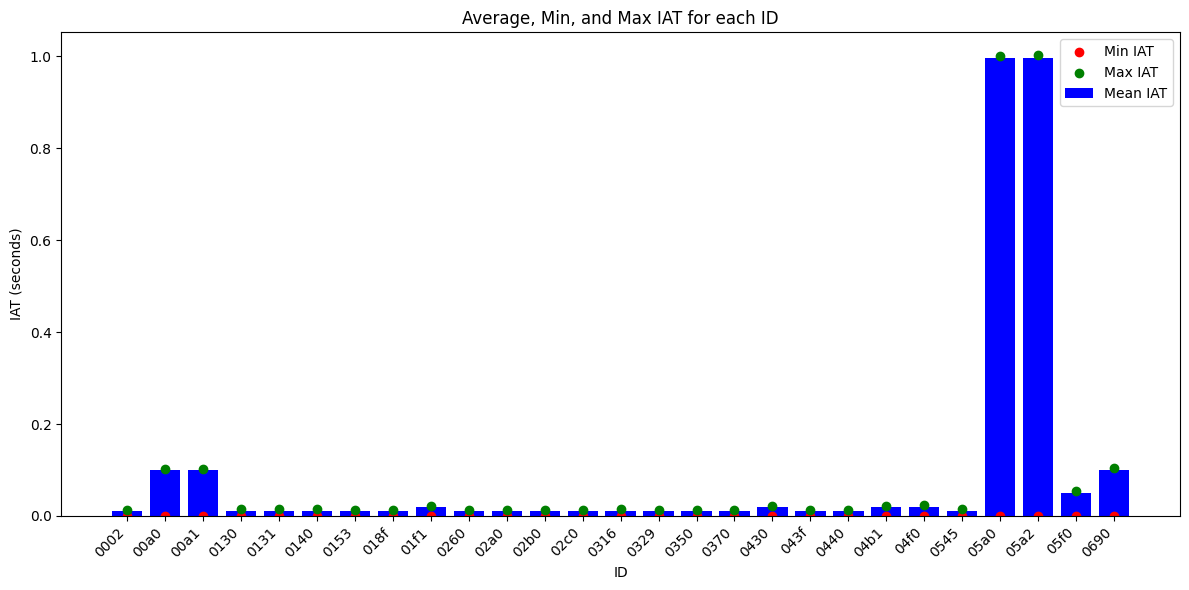

In [69]:
plot_id_iat_summary(bengin_ch_iat)

In [70]:
bengin_ch_iat[bengin_ch_iat['ID'] == '05a2']['ID_IAT'].mean()

0.9971437632920004

In [170]:
dos_ch = pd.read_csv(os.path.join(ch_data_dir, 'preprocessed_car_hacking.csv'))
dos_ch.head()

,Timestamp,ID,DLC,Payload,IAT,label
0,1.478198e+09,0316,8,052168092121006f,0.000000,0
1,1.478198e+09,018f,8,fe5b0000003c0000,0.000209,0
2,1.478198e+09,0260,8,19212230088e6d3a,0.000228,0
3,1.478198e+09,02a0,8,64009a1d9702bd00,0.000232,0
4,1.478198e+09,0329,8,40bb7f1411200014,0.000237,0


In [80]:
print("DoS Car Hacking mean IAT: ",np.mean(dos_ch['IAT']))
print("DoS Car Hacking min IAT: ",np.min(dos_ch.iloc[1:,:]['IAT']))
print("DoS Car Hacking max IAT: ",np.max(dos_ch['IAT']))

DoS Car Hacking mean IAT:  0.0007727349900034838
DoS Car Hacking min IAT:  2.384185791015625e-05
DoS Car Hacking max IAT:  22.358267068862915


In [171]:
dos_ch['Timestamp'] = pd.to_datetime(dos_ch['Timestamp'], unit = 's')
dos_ch.head()

,Timestamp,ID,DLC,Payload,IAT,label
0,2016-11-03 18:39:36.389426944,0316,8,052168092121006f,0.000000,0
1,2016-11-03 18:39:36.389636096,018f,8,fe5b0000003c0000,0.000209,0
2,2016-11-03 18:39:36.389863936,0260,8,19212230088e6d3a,0.000228,0
3,2016-11-03 18:39:36.390095872,02a0,8,64009a1d9702bd00,0.000232,0
4,2016-11-03 18:39:36.390332928,0329,8,40bb7f1411200014,0.000237,0


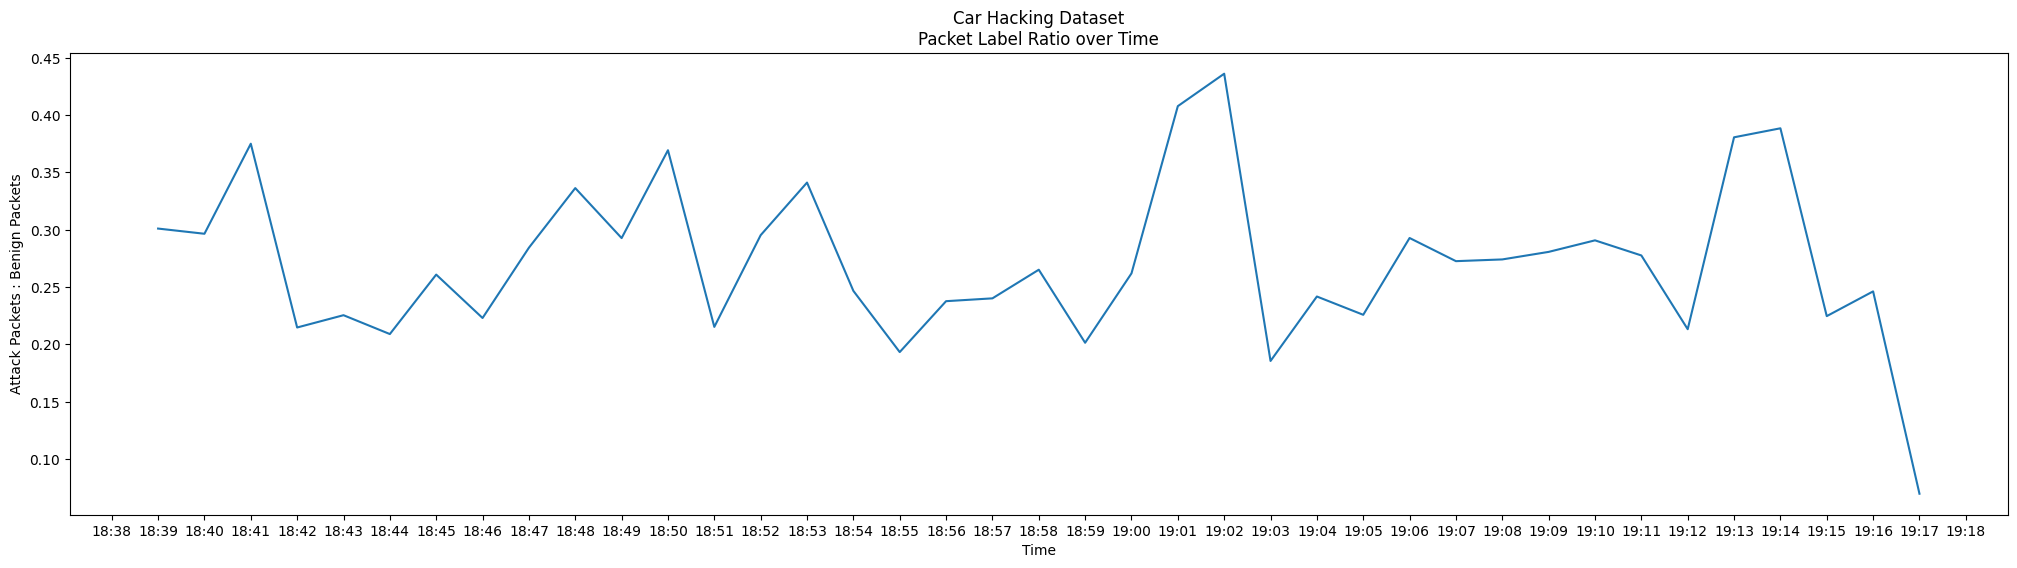

In [199]:
# # Resample the data per minute and count the occurrences of each label
# resampled_data = dos_ch.groupby([pd.Grouper(key='Timestamp', freq='1Min'), 'label']).size().unstack(fill_value=0)

# fig, ax = plt.subplots(figsize=(50, 20))


# # Plot the results
# resampled_data.plot(kind='bar', stacked=False, ax = ax)

# plt.title('Distribution of Labels Over Time', fontsize=32)
# plt.xlabel('Time', fontsize=30)
# plt.ylabel('Count', fontsize=30)


# # Enlarge the legend
# plt.legend(fontsize=20)

# # Enlarge the tick labels on both axes
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)

# Assuming dos_ch is your DataFrame with 'Timestamp' and 'label' columns
# Assuming 'Timestamp' is in datetime format
# dos_ch['Timestamp'] = pd.to_datetime(dos_ch['Timestamp'])

# Resample the data to a suitable interval, for example, every minute
dos_ch_resampled = dos_ch.resample('1T', on='Timestamp').count()

# Calculate the ratio of label 1 to label 0
label_1_count = dos_ch[dos_ch['label'] == 1].resample('1T', on='Timestamp').count()['label']
label_0_count = dos_ch[dos_ch['label'] == 0].resample('1T', on='Timestamp').count()['label']
dos_ch_resampled['label_ratio'] = label_1_count / label_0_count

plt.figure(figsize=(25, 6))

# Plot the ratio
plt.plot(dos_ch_resampled.index, dos_ch_resampled['label_ratio'])
plt.xlabel('Time')
plt.ylabel('Attack Packets : Benign Packets')
plt.title('Car Hacking Dataset\nPacket Label Ratio over Time')

# Format x-axis timestamps as MM:SS
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=1))

plt.show()


In [127]:
dos_ch

,Timestamp,ID,DLC,Payload,IAT,label,MinutesSinceStart
0,2016-11-03 18:39:36.389426944,0316,8,052168092121006f,0.000000,0,0.000000
1,2016-11-03 18:39:36.389636096,018f,8,fe5b0000003c0000,0.000209,0,0.000003
2,2016-11-03 18:39:36.389863936,0260,8,19212230088e6d3a,0.000228,0,0.000007
3,2016-11-03 18:39:36.390095872,02a0,8,64009a1d9702bd00,0.000232,0,0.000011
4,2016-11-03 18:39:36.390332928,0329,8,40bb7f1411200014,0.000237,0,0.000015
...,...,...,...,...,...,...,...
3665766,2016-11-03 19:26:49.058007040,018f,8,fe59000000410000,0.000225,0,47.211143
3665767,2016-11-03 19:26:49.058237184,0260,8,18212130088f6d19,0.000230,0,47.211147
3665768,2016-11-03 19:26:49.058470912,02a0,8,24009a1d9702bd00,0.000234,0,47.211151
3665769,2016-11-03 19:26:49.058702848,0329,8,dcb77f1411200014,0.000232,0,47.211155


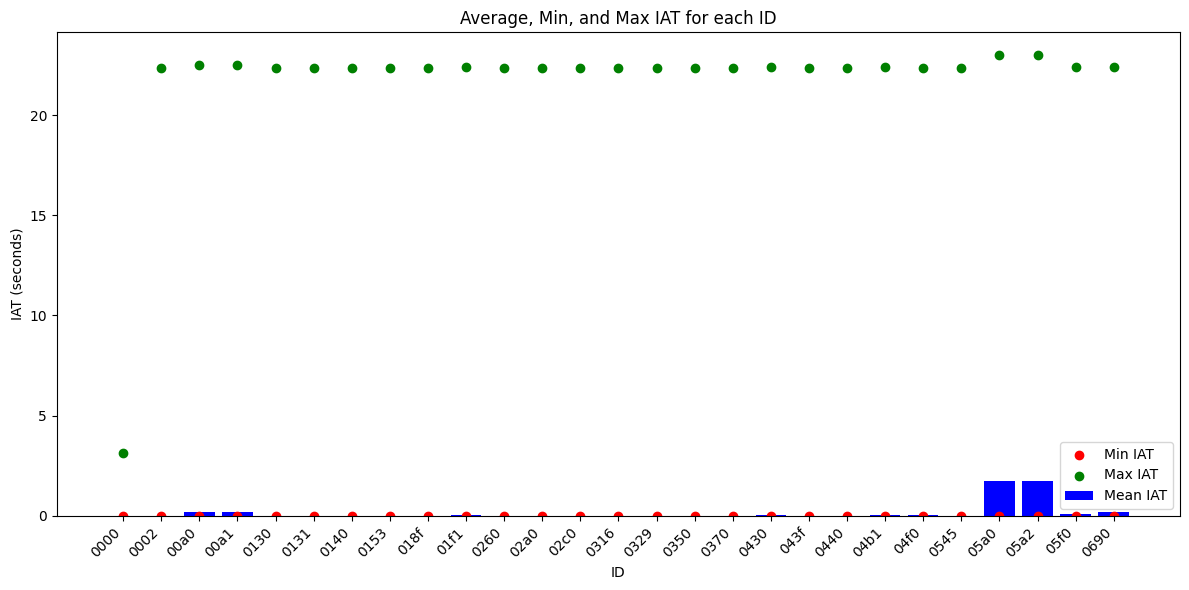

In [12]:
dos_ch_iat = calculate_id_iat(dos_ch)
plot_id_iat_summary(dos_ch_iat)

In [13]:
smart_dos_ch = pd.read_csv(os.path.join(ch_data_dir, 'smart_output.csv'))
smart_dos_ch = smart_dos_ch.assign(IAT=smart_dos_ch['Timestamp'].diff().fillna(0))
smart_dos_ch.head()

,Timestamp,ID,DLC,Payload,label,IAT
0,1.479121e+09,848.0,8.0,3.716925e+17,0.0,0.000000
1,1.479121e+09,704.0,8.0,1.441152e+18,0.0,0.000221
2,1.479121e+09,1072.0,8.0,0.000000e+00,0.0,0.000554
3,1.479121e+09,1201.0,8.0,0.000000e+00,0.0,0.000238
4,1.479121e+09,497.0,8.0,0.000000e+00,0.0,0.000248


In [16]:
def pad_hex(val):
    
    val = ((4 - len(val)) * '0') + val

    return val

In [17]:
smart_dos_ch['ID'] = smart_dos_ch["ID"].apply(lambda x: pad_hex(hex(int(x))[2:]))

In [18]:
print("Smart DoS Car Hacking mean IAT: ",np.mean(smart_dos_ch['IAT']))
print("Smart DoS Car Hacking min IAT: ",np.min(smart_dos_ch.iloc[1:,:]['IAT']))
print("Smart DoS Car Hacking max IAT: ",np.max(smart_dos_ch['IAT']))

Smart DoS Car Hacking mean IAT:  0.0005027753607061352
Smart DoS Car Hacking min IAT:  -0.2697610855102539
Smart DoS Car Hacking max IAT:  0.015037059783935547


In [19]:
smart_dos_ch[smart_dos_ch['IAT'] < 0]

,Timestamp,ID,DLC,Payload,label,IAT
142,1.479121e+09,0350,8.0,3.718157e+17,0.0,-0.019983
184,1.479121e+09,0350,8.0,3.715694e+17,0.0,-0.019982
318,1.479121e+09,0440,8.0,1.837469e+19,0.0,-0.209814
374,1.479121e+09,0440,8.0,1.837469e+19,0.0,-0.169850
1642,1.479121e+09,0545,8.0,1.559034e+19,0.0,-0.049956
...,...,...,...,...,...,...
1004396,1.479122e+09,0153,8.0,1.095233e+12,0.0,-0.019982
1004999,1.479122e+09,0545,8.0,1.556444e+19,0.0,-0.009991
1005371,1.479122e+09,0545,8.0,1.556444e+19,0.0,-0.009991
1005450,1.479122e+09,0545,8.0,1.556444e+19,0.0,-0.019982


In [18]:
##FIX INJECTION CODE, IAT CANT be negative

In [3]:
ch_imp_dir = '../data/Car Hacking Impersonation/'
imp_ch = pd.read_csv(os.path.join(ch_imp_dir, 'preprocessed_ch_impersonation.csv'))

In [16]:
print("Car Hacking Impersonation mean IAT: ",np.mean(imp_ch['IAT']))
print("Car Hacking Impersonation min IAT: ",np.min(imp_ch.drop(4621702).iloc[1:,:]['IAT']))
print("Car Hacking Impersonation max IAT: ",np.max(imp_ch['IAT']))

Car Hacking Impersonation mean IAT:  0.001122911087046409
Car Hacking Impersonation min IAT:  1.4781951904296877e-05
Car Hacking Impersonation max IAT:  7744.934786081314


In [18]:
imp_ch[imp_ch['IAT'] > 7744]

,Timestamp,ID,DLC,Payload,IAT,label
3730634,1.478201e+09,0545,8,d855008a00000000,7744.934786,0


In [20]:
imp_ch.iloc[3730630:3730640]

,Timestamp,ID,DLC,Payload,IAT,label
3730630,1.478193e+09,0545,8,d800008a00000000,0.000240,0
3730631,1.478193e+09,0370,8,0020000000000000,0.000292,0
3730632,1.478193e+09,043f,8,004060ff7ad20800,0.000200,0
3730633,1.478193e+09,0440,8,ff000000ffd20800,0.000245,0
3730634,1.478201e+09,0545,8,d855008a00000000,7744.934786,0
3730635,1.478201e+09,04f0,8,000000800069d113,0.000933,0
3730636,1.478201e+09,0350,8,0520d468740000ed,0.000434,0
3730637,1.478201e+09,0690,8,00000100a0220000,0.000407,0
3730638,1.478201e+09,0430,8,0000000000000000,0.000998,0
3730639,1.478201e+09,04b1,8,292727230000009a,0.000232,0


In [21]:
imp_ch.iloc[3730633]['Timestamp']

1478192982.484684

In [24]:
print(1.4781951904296877e-05)

1.4781951904296877e-05


In [195]:
mcan_dir = '../data/M-CAN Intrusion Dataset/'
normal_mcan = pd.read_csv(os.path.join(mcan_dir,'g80_mcan_normal_data.csv'))
ddos_mcan = pd.read_csv(os.path.join(mcan_dir,'g80_mcan_ddos_data.csv'))

In [196]:
normal_mcan = normal_mcan.assign(IAT=normal_mcan['Timestamp'].diff().fillna(0))
ddos_mcan = ddos_mcan.assign(IAT=ddos_mcan['Timestamp'].diff().fillna(0))

In [39]:
print("Normal MCAN mean IAT: ",np.mean(normal_mcan['IAT']))
print("Normal MCAN min IAT: ",np.min(normal_mcan.iloc[1:,:]['IAT']))
print("Normal MCAN max IAT: ",np.max(normal_mcan['IAT']))

Normal MCAN mean IAT:  0.002644054468282897
Normal MCAN min IAT:  0.0010299999999006104
Normal MCAN max IAT:  0.019800000000032014


In [40]:
print("DDoS MCAN mean IAT: ",np.mean(ddos_mcan['IAT']))
print("DDoS MCAN min IAT: ",np.min(ddos_mcan.iloc[1:,:]['IAT']))
print("DDoS MCAN max IAT: ",np.max(ddos_mcan['IAT']))

DDoS MCAN mean IAT:  0.0017753998143798149
DDoS MCAN min IAT:  0.0
DDoS MCAN max IAT:  0.019800000000032014


In [197]:
ddos_mcan['Timestamp'] = pd.to_datetime(ddos_mcan['Timestamp'], unit='s')
ddos_mcan.head()

,Timestamp,ID,DLC,Payload,label,IAT
0,1970-01-01 00:26:21.842180,00000122,8,7F 00 00 00 00 00 1F FF,0.0,0.00000
1,1970-01-01 00:26:21.851750,0000033D,8,00 00 00 00 03 00 00 00,0.0,0.00957
2,1970-01-01 00:26:21.862460,00000581,8,00 00 00 00 00 00 00 00,0.0,0.01071
3,1970-01-01 00:26:21.863680,000001D2,8,E3 40 00 03 00 00 00 00,0.0,0.00122
4,1970-01-01 00:26:21.864920,00000571,8,7F 00 00 00 00 00 00 00,0.0,0.00124


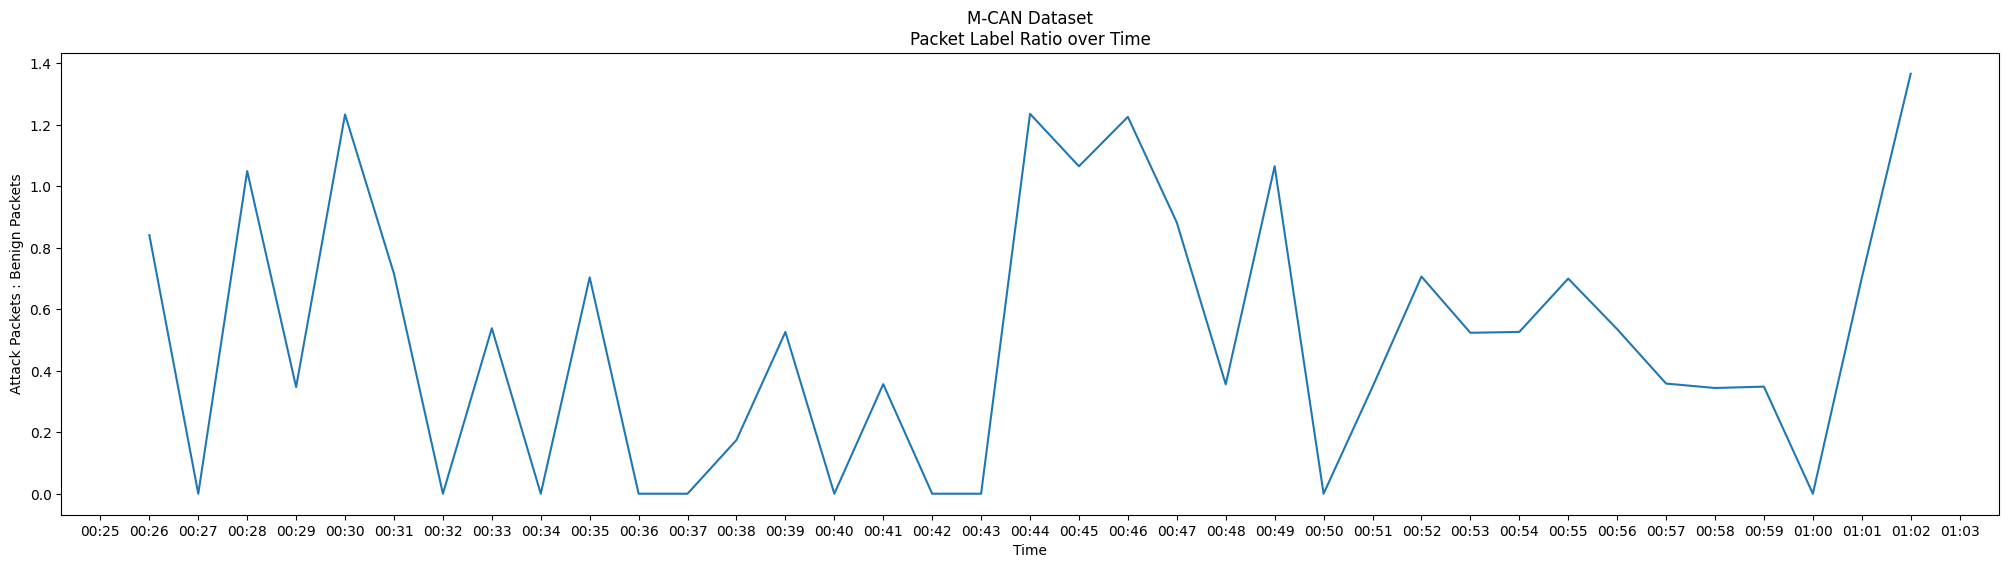

In [200]:
ddos_mcan['Timestamp'] = pd.to_datetime(ddos_mcan['Timestamp'])

# Resample the data to a suitable interval, for example, every minute
ddos_mcan_resampled = ddos_mcan.resample('1T', on='Timestamp').count()

# Calculate the ratio of label 1 to label 0
label_1_count = ddos_mcan[ddos_mcan['label'] == 1].resample('1T', on='Timestamp').count()['label']
label_0_count = ddos_mcan[ddos_mcan['label'] == 0].resample('1T', on='Timestamp').count()['label']
ddos_mcan_resampled['label_ratio'] = label_1_count / label_0_count

plt.figure(figsize=(25, 6))

# Plot the ratio
plt.plot(ddos_mcan_resampled.index, ddos_mcan_resampled['label_ratio'])
plt.xlabel('Time')
plt.ylabel('Attack Packets : Benign Packets')
plt.title('M-CAN Dataset\nPacket Label Ratio over Time')

# Format x-axis timestamps as MM:SS
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=1))

plt.show()


In [59]:
ddos_mcan.iloc[61050]

Timestamp                  1699.3913
ID                          00000000
DLC                                8
Payload      00 00 00 00 00 00 00 00
label                            1.0
IAT                              0.0
Name: 61050, dtype: object

In [58]:
ddos_mcan.iloc[61049]

Timestamp                  1699.3913
ID                          00000000
DLC                                8
Payload      00 00 00 00 00 00 00 00
label                            1.0
IAT                           0.0001
Name: 61049, dtype: object

In [44]:
normal_mcan.shape

(817540, 6)

In [ ]:
ddo